# Bias Variance Tradeoff

In this notebook we investigate the bias and variance of models. In the first section we'll investigate fitting functions of the form:

$$f(x) = a + b * x^n$$

to some cubic data with noise.

In [4]:
% matplotlib inline
from __future__ import print_function
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
# from sklearn import datasets, linear_model
import statsmodels.api as sm

## Some helper functions
The following functions will generate data and polynomial values.

In [5]:
def polynomials(X, degree=1):
    # See also numpy.vander
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [6]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [7]:
mu, sigma = 0, 0.1 # mean and standard deviation
# norm = np.random.normal(mu, sigma)

# Generate some data
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4$.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     33.65
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.37e-05
Time:                        10:52:33   Log-Likelihood:                -51.420
No. Observations:                  20   AIC:                             104.8
Df Residuals:                      19   BIC:                             105.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.0406      0.697      5.801      0.0

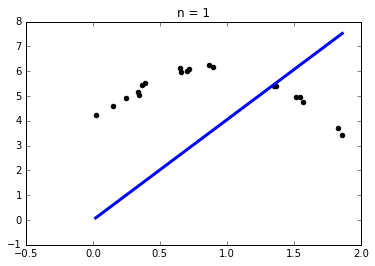

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     12.26
Date:                Wed, 12 Oct 2016   Prob (F-statistic):            0.00239
Time:                        10:52:34   Log-Likelihood:                -56.633
No. Observations:                  20   AIC:                             115.3
Df Residuals:                      19   BIC:                             116.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0989      0.600      3.501      0.0

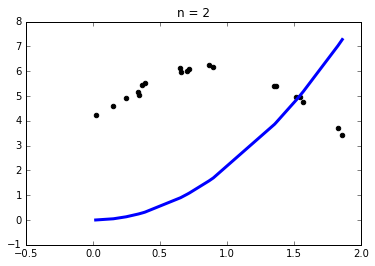

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     7.313
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0141
Time:                        10:52:34   Log-Likelihood:                -58.355
No. Observations:                  20   AIC:                             118.7
Df Residuals:                      19   BIC:                             119.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.0716      0.396      2.704      0.0

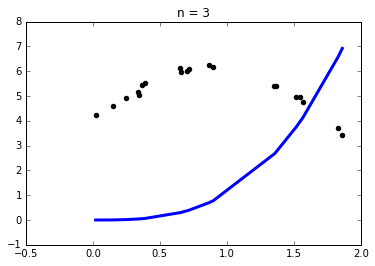

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     5.253
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0335
Time:                        10:52:34   Log-Likelihood:                -59.170
No. Observations:                  20   AIC:                             120.3
Df Residuals:                      19   BIC:                             121.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.5531      0.241      2.292      0.0

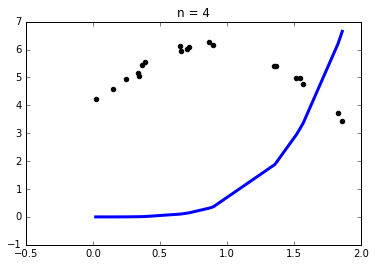

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.100
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0572
Time:                        10:52:35   Log-Likelihood:                -59.658
No. Observations:                  20   AIC:                             121.3
Df Residuals:                      19   BIC:                             122.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2863      0.141      2.025      0.0

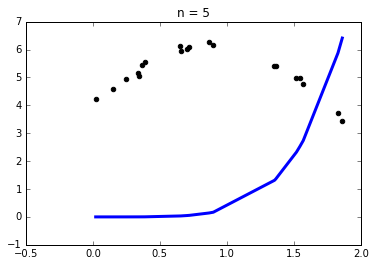

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.339
Date:                Wed, 12 Oct 2016   Prob (F-statistic):             0.0834
Time:                        10:52:35   Log-Likelihood:                -59.992
No. Observations:                  20   AIC:                             122.0
Df Residuals:                      19   BIC:                             123.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.1479      0.081      1.827      0.0

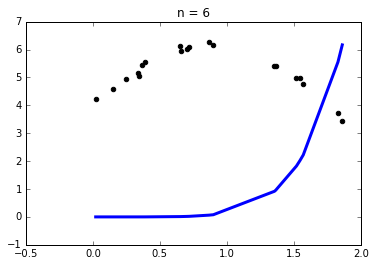

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     2.793
Date:                Wed, 12 Oct 2016   Prob (F-statistic):              0.111
Time:                        10:52:36   Log-Likelihood:                -60.240
No. Observations:                  20   AIC:                             122.5
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0762      0.046      1.671      0.1

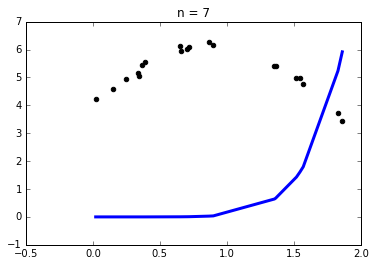

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     2.386
Date:                Wed, 12 Oct 2016   Prob (F-statistic):              0.139
Time:                        10:52:36   Log-Likelihood:                -60.428
No. Observations:                  20   AIC:                             122.9
Df Residuals:                      19   BIC:                             123.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0392      0.025      1.545      0.1

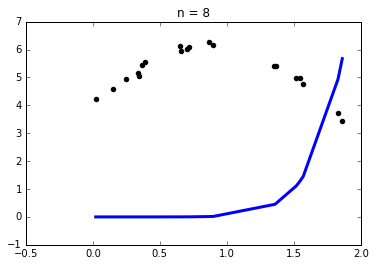

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.075
Date:                Wed, 12 Oct 2016   Prob (F-statistic):              0.166
Time:                        10:52:36   Log-Likelihood:                -60.575
No. Observations:                  20   AIC:                             123.1
Df Residuals:                      19   BIC:                             124.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.0202      0.014      1.441      0.1

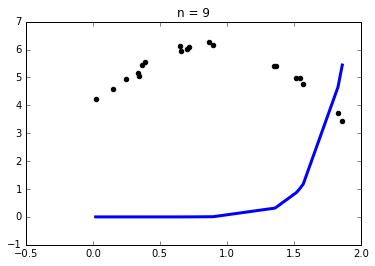

In [8]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to note that the true measures of bias and variance are averaged over many fits to many samples from the same data source, and we're only looking at one instance here. Notice that the bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

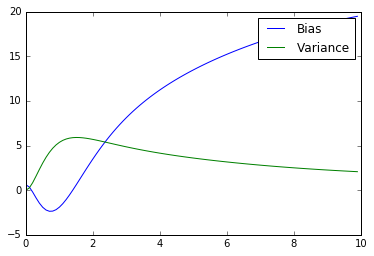

In [9]:
bs = []
vars = []
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what changes when compared to the code above?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     33.65
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.37e-05
Time:                        10:52:55   Log-Likelihood:                -51.420
No. Observations:                  20   AIC:                             104.8
Df Residuals:                      19   BIC:                             105.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             4.0406      0.697      5.801      0.0

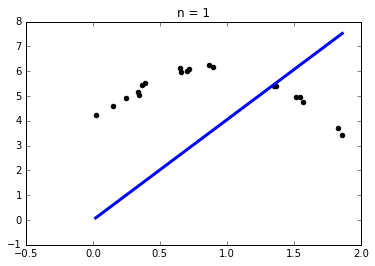

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     123.8
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.02e-11
Time:                        10:52:56   Log-Likelihood:                -34.696
No. Observations:                  20   AIC:                             73.39
Df Residuals:                      18   BIC:                             75.38
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            13.9355      1.164     11.976      0.0

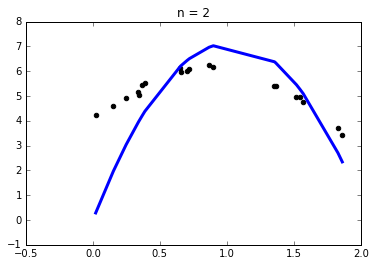

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     134.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.72e-12
Time:                        10:52:56   Log-Likelihood:                -29.502
No. Observations:                  20   AIC:                             65.00
Df Residuals:                      17   BIC:                             67.99
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            20.1934      2.058      9.813      0.0

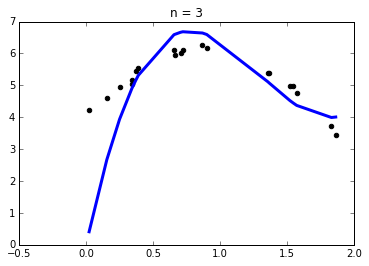

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     136.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.70e-12
Time:                        10:52:56   Log-Likelihood:                -25.994
No. Observations:                  20   AIC:                             59.99
Df Residuals:                      16   BIC:                             63.97
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            28.7523      3.751      7.666      0.0

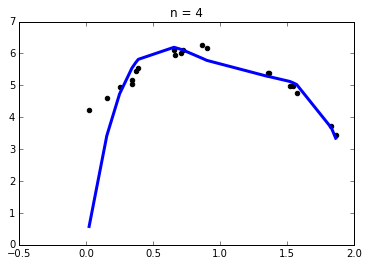

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     118.9
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.62e-11
Time:                        10:52:57   Log-Likelihood:                -24.569
No. Observations:                  20   AIC:                             59.14
Df Residuals:                      15   BIC:                             64.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            38.2282      7.217      5.297      0.0

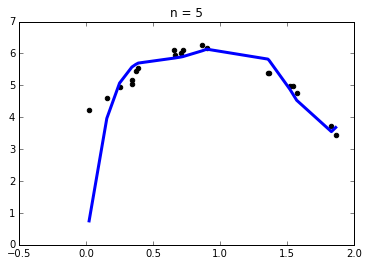

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     118.7
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.45e-11
Time:                        10:52:57   Log-Likelihood:                -22.128
No. Observations:                  20   AIC:                             56.26
Df Residuals:                      14   BIC:                             62.23
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            59.1799     12.535      4.721      0.0

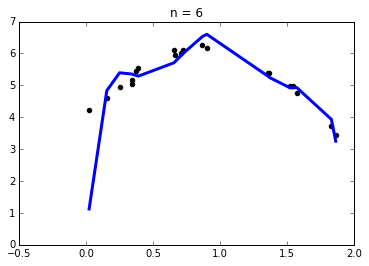

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     114.0
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.21e-10
Time:                        10:52:58   Log-Likelihood:                -20.278
No. Observations:                  20   AIC:                             54.56
Df Residuals:                      13   BIC:                             61.53
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            80.8421     17.840      4.532      0.0

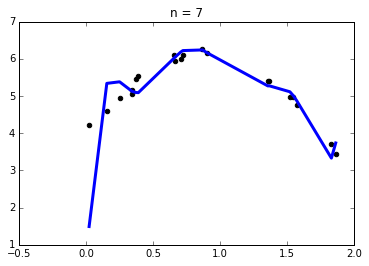

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     110.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.76e-10
Time:                        10:52:58   Log-Likelihood:                -18.508
No. Observations:                  20   AIC:                             53.02
Df Residuals:                      12   BIC:                             60.98
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           103.6564     22.646      4.577      0.0

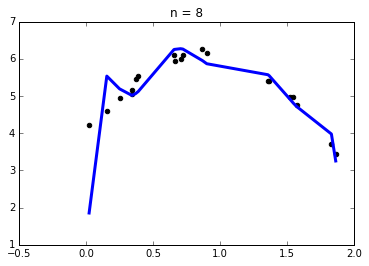

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     259.2
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           1.67e-11
Time:                        10:52:58   Log-Likelihood:                -7.9943
No. Observations:                  20   AIC:                             33.99
Df Residuals:                      11   BIC:                             42.95
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1           201.3403     25.720      7.828      0.0

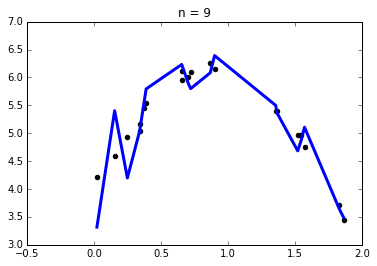

In [10]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

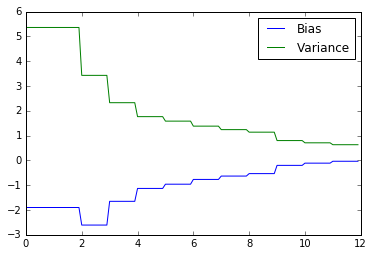

In [11]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

# Guided Practice

We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investigate the bias and variance as the data source changes in complexity


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     382.8
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.75e-14
Time:                        11:19:41   Log-Likelihood:                -12.591
No. Observations:                  20   AIC:                             27.18
Df Residuals:                      19   BIC:                             28.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             1.8345      0.094     19.565      0.0

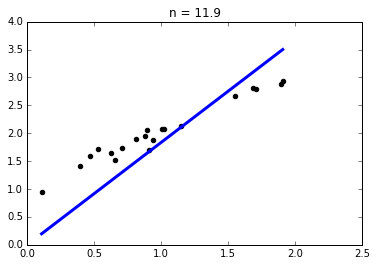

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     182.4
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.43e-11
Time:                        11:19:41   Log-Likelihood:                -30.717
No. Observations:                  20   AIC:                             63.43
Df Residuals:                      19   BIC:                             64.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             3.1520      0.233     13.506      0.0

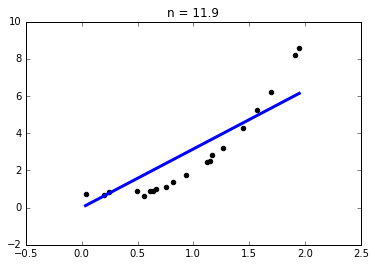

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     73.50
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           5.91e-08
Time:                        11:19:41   Log-Likelihood:                -50.028
No. Observations:                  20   AIC:                             102.1
Df Residuals:                      19   BIC:                             103.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             5.5646      0.649      8.573      0.0

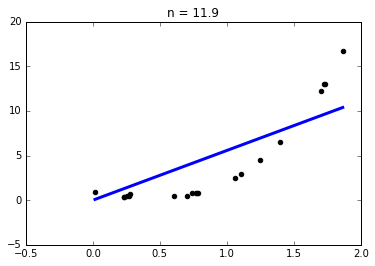

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     80.24
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.00e-08
Time:                        11:19:42   Log-Likelihood:                -66.764
No. Observations:                  20   AIC:                             135.5
Df Residuals:                      19   BIC:                             136.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            11.8728      1.325      8.958      0.0

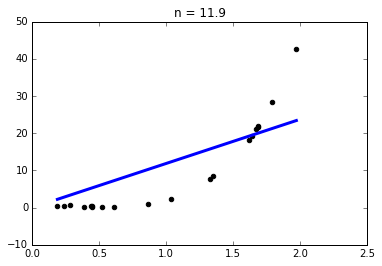

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     40.54
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           4.16e-06
Time:                        11:19:42   Log-Likelihood:                -83.890
No. Observations:                  20   AIC:                             169.8
Df Residuals:                      19   BIC:                             170.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            20.7576      3.260      6.367      0.0

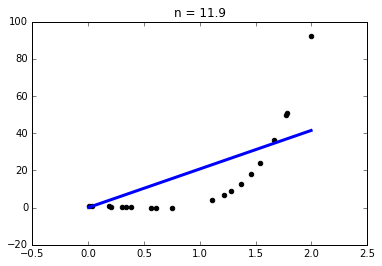

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     41.43
Date:                Wed, 12 Oct 2016   Prob (F-statistic):           3.60e-06
Time:                        11:19:42   Log-Likelihood:                -99.921
No. Observations:                  20   AIC:                             201.8
Df Residuals:                      19   BIC:                             202.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            43.3224      6.731      6.437      0.0

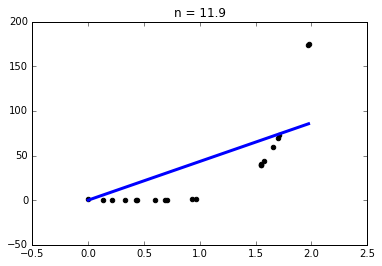

In [14]:
for degree in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** degree + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
    regr = sm.OLS(Y, X).fit()

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print(regr.summary())

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()


# Individual Exercises

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

> Answer: These functions are not polynomial in nature and can be arbitrarily well approximately with a sufficiently large polynomial.

In [ ]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    pass
    # Fit a polynomial of degree i to the data
    
    # Compute the errors

    # Plot outputs


### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.

### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?

> Answer: This model has high bias.